In [388]:
import numpy as np
import scipy.stats as sts
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [36]:
#Задача 1

Оценка методом максимального правдоподобия:
42


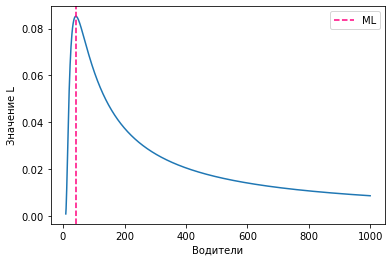

In [3]:
#Вероятность того, что второй водитель будет новым (n-1)/n, третий - (n-2)/n и так далее до 10-ого.
#Вероятность того, что 10-ый водитель будет не новым равна 1-(n-9)/n=9/n
n=np.arange(9, 1000)
L=1
for i in range (9):
    L=L*(n-i)/n
L=L*9/n
plt.plot(n, L)
plt.axvline(np.argmax(L)+9, color='#FF007F',linestyle='--',label='ML')
plt.legend()
plt.ylabel('Значение L')
plt.xlabel('Водители')
print('Оценка методом максимального правдоподобия:')
print (np.argmax(L)+9)

MM оценка
55


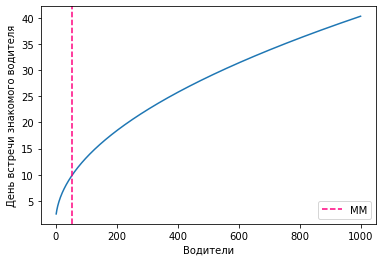

In [7]:
def prob(k, n):
    p = 1
    for j in range(k-1):
        p = p*(n-j)/n
    p=p*(k-1)/n
    return (p)
def E(n):
    E = 0
    for k in range(2, n+2):
        E =E+ k*prob(k, n)
    return(E)
n_all= np.arange(2, 1000)
outof = np.vectorize(E)
E_k= outof(n_all)
plt.plot(n_all,E_k)
plt.axvline(np.argmin(np.abs(E_k - 10)), color='#FF007F',linestyle='--',label='MM')
plt.legend()
plt.ylabel('День встречи знакомого водителя')
plt.xlabel('Водители')
print('MM оценка')
print(n_all[np.argmin(np.abs(E_k - 10))])


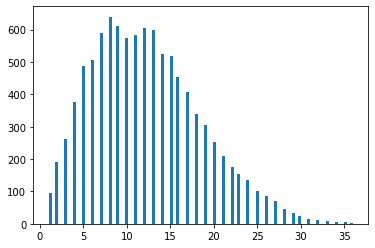

In [232]:
taxopark=np.arange(1,101)
seen_you=[]
for i in range (1,10001):
    route=0
    cabs=[]
    cab=np.random.choice(taxopark)
    while cab not in cabs:
        cabs.append(cab)
        route+=1
        cab=np.random.choice(taxopark)
    seen_you.append(route)
plt.hist(seen_you, bins = 100);


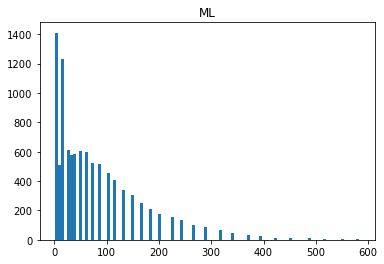

In [233]:
ML=[]
taxi=np.arange(1,1001)
for k in seen_you:
    pML=[]
    for n in range (k,1000):
        pML.append(prob(k,n))
    ML.append(taxi[np.argmax(pML)])
plt.hist(ML, bins = 100);
plt.title('ML')
plt.show()

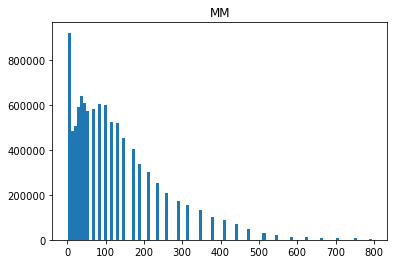

In [234]:
MM=[]
EMM=outof(taxi)
for k in seen_you:
    for n in range(1000):
        MM.append(taxi[np.argmin(np.abs(EMM-k))])
plt.hist(MM, bins = 100);
plt.title('MM')
plt.show()

In [235]:
from sklearn.metrics import mean_squared_error
df1=pd.DataFrame({'Смещение':((np.abs(100-np.mean(ML))),(np.abs(100-np.mean(MM)))), 'Вариация':((np.var(ML)),(np.var(MM))), 'MSE':((mean_squared_error(ML,[100]*len(ML))),(mean_squared_error(MM,[100]*len(MM))))}, ['ML','MM'])
df1

,Смещение,Вариация,MSE
ML,26.6299,6453.529326,7162.6809
MM,10.4708,12372.240147,12481.8778


In [289]:
#Задача 3
#а)
simulation=np.random.exponential(1, size=(10**4, 20))
left3= np.mean(simulation, axis=1) - 1.96 * (np.std(simulation, ddof = 1, axis = 1)/ np.sqrt(20))
right3= np.mean(simulation, axis=1) + 1.96 * (np.std(simulation, ddof = 1, axis = 1)/ np.sqrt(20))
count=0
#Для экспоненциального распределения: E=a, где а - интенсивность, т. е. в нашем случае: Е=1.
for i in range(10**4):
    if (left3[i]<=1) and (right3[i]>=1):
        count+=1
CI_pop=count/10**4
print ('Вероятность покрытия мат. ожидания, используя классический асимптотический нормальный интервал')
print(CI_pop)

Вероятность покрытия мат. ожидания, используя классический асимптотический нормальный интервал
0.9045


In [290]:
left33=[]
right33=[]
real=np.mean(simulation)
SE3=[]
for i in range(len(simulation)):
    boot=np.random.choice(simulation[i], size = (10 ** 4, 20))
    NB= np.mean(boot, axis = 1)
    left33.append(np.quantile(NB,0.025))
    right33.append(np.quantile(NB,0.975))
    SE3.append(np.sqrt(np.var(boot, ddof=1)/20))
countn=0
for i in range(10**4):
    if (left33[i]<=1) and (right33[i]>=1):
        countn+=1
NaivBoot=countn/10**4
print ('Вероятность покрытия мат. ожидания, используя наивный бутстрэп')
print(NaivBoot)

Вероятность покрытия мат. ожидания, используя наивный бутстрэп
0.9028


In [291]:
tboot=[]
tleft=[]
tright=[]
for i in range (10**4):
    tboot=[]
    for j in range (10**4):
        tboot.append((NB[j]-real)/SE3[i])
    tleft.append(np.quantile(tboot,0.025))
    tright.append(np.quantile(tboot,0.975))
    
tcount=0
for i in range(10**4):
    if (tleft[i]<=1) and (tright[i]>=1):
        tcount+=1
TBoots=tcount/10**4
print ('Вероятность покрытия мат. ожидания, используя t бутстрэп')
print(TBoots)

Вероятность покрытия мат. ожидания, используя t бутстрэп
0.9807


In [325]:
#б)
simulationt=np.random.standard_t(3, size=(10**4,20))
l= np.mean(simulationt, axis=1) - 1.96 * (np.std(simulationt, ddof = 1, axis = 1)/ np.sqrt(20))
r= np.mean(simulationt, axis=1) + 1.96 * (np.std(simulationt   , ddof = 1, axis = 1)/ np.sqrt(20))
c=0
#Для распределения Стъюдента: E=0.
for i in range(10**4):
    if (l[i]<=0) and (r[i]>=0):
        c+=1
TCI=c/10**4
print ('Вероятность покрытия мат. ожидания, используя классический асимптотический нормальный интервал')
print(TCI)

Вероятность покрытия мат. ожидания, используя классический асимптотический нормальный интервал
0.94


In [326]:
l3=[]
r3=[]
rl=np.mean(simulationt)
S3=[]
for i in range(len(simulationt)):
    bt=np.random.choice(simulationt[i], size = (10 ** 4, 20))
    TNB= np.mean(bt, axis = 1)
    l3.append(np.quantile(TNB,0.025))
    r3.append(np.quantile(TNB,0.975))
    S3.append(np.sqrt(np.var(bt, ddof=1)/20))
cn=0
for i in range(10**4):
    if (l3[i]<=0) and (r3[i]>=0):
        cn+=1
TNaivBoot=cn/10**4
print ('Вероятность покрытия мат. ожидания, используя наивный бутстрэп')
print(TNaivBoot)

Вероятность покрытия мат. ожидания, используя наивный бутстрэп
0.9184


In [327]:
tft=[]
tht=[]
for i in range (10**4):
    tot=[]
    for j in range (10**4):
        tot.append((TNB[j]-rl)/(S3[i]))
    tft.append(np.quantile(tot,0.025))
    tht.append(np.quantile(tot,0.975))
    
tnt=0
for i in range(10**4):
    if (tft[i]<=0) and (tht[i]>=0):
        tnt+=1
TTBoots=tnt/10**4
print ('Вероятность покрытия мат. ожидания, используя t бутстрэп')
print(TTBoots)

Вероятность покрытия мат. ожидания, используя t бутстрэп
1.0


In [328]:
#Самым действенным оказался t бутстрэп, так как в отличие от наивного бутстрэпа он учитывает SE, и в нем больше наблюдений, чем при расчете классического асимптотического нормального интервала. 

In [13]:
#Задача 4
df = pd.read_csv('exam_hse.csv', sep = ',')
df

,Last name,Name,Экзамен
0,Репенкова,Полина Александровна,4.0
1,Сафина,Алия Линаровна,5.0
2,Сидоров,Иван Максимович,9.0
3,Солоухин,Иван Владимирович,6.0
4,Старощук,Богдан Павлович,8.0
...,...,...,...
291,Петрова,Марьяна Петровна,2.0
292,Полищук,Мария Вячеславовна,8.0
293,Савенкова,Софья Дмитриевна,1.0
294,Сенников,Александр -,5.0


In [24]:
def first_letter(n):
    fl=[]
    for i in n:
        fl.append(str(i)[0])
    return (fl)
glasn=['А','О','Э','Я','И','Ю','У','Е']
df['First Letter']=np.where(np.isin(first_letter(list(df['Last name'])),glasn), 1,0)
df

,Last name,Name,Экзамен,First Letter
0,Репенкова,Полина Александровна,4.0,0
1,Сафина,Алия Линаровна,5.0,0
2,Сидоров,Иван Максимович,9.0,0
3,Солоухин,Иван Владимирович,6.0,0
4,Старощук,Богдан Павлович,8.0,0
...,...,...,...,...
291,Петрова,Марьяна Петровна,2.0,0
292,Полищук,Мария Вячеславовна,8.0,0
293,Савенкова,Софья Дмитриевна,1.0,0
294,Сенников,Александр -,5.0,0


In [29]:
#Тест Уэлча
glasnie=df.loc[df['First Letter'] == 1]['Экзамен']
soglasnie=df.loc[df['First Letter'] == 0]['Экзамен']
sts.ttest_ind(glasnie, soglasnie, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-0.8699152632485405, pvalue=0.3880729475392024)

In [27]:
#p-value больше посчитанного значения, а значит нулевая гипотеза не отвергается на уровне значимости 5%

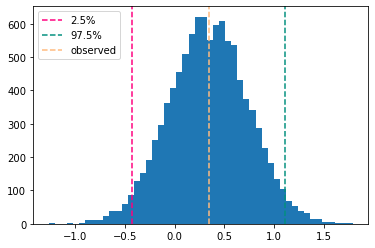

0.99


In [169]:
#Наивный бутстрэп
glasnie_boot=np.random.choice(glasnie, size = (10 ** 4, len(glasnie)))
soglasnie_boot=np.random.choice(soglasnie, size = (10 ** 4, len(soglasnie)))
observed=np.mean(soglasnie)-np.mean(glasnie)
raz=[]
for i in range(10**4):
    raz.append(np.mean(soglasnie_boot[i])-np.mean(glasnie_boot[i]))
left=np.quantile(raz,0.025)
right=np.quantile(raz,0.975)
plt.hist(raz, bins=50)
plt.axvline(left, color='#FF007F',linestyle='--',label='2.5%')
plt.axvline(right, color='#02907F',linestyle='--',label='97.5%')
plt.axvline(observed, color='#FFBB7F',linestyle='--',label='observed')
plt.legend()
plt.show()
first=0
second=0
for j in range(10**4):
    if raz[j]<=observed:
        first+=1
    if raz[j]>observed:
        second+=1
pvalue = 2 * min(np.mean(first),np.mean(second))/10**4
print(pvalue)

In [113]:
#Наблюдаемое значение попадает в доверительный интервал.
#Так же p-value больше 0.05, т. е. гипотеза о равенстве не отвергается

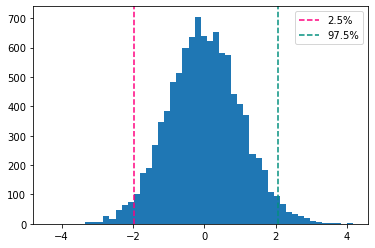

0.3892


In [171]:
#t-бутстрэп
tboot=[]
for j in range (10**4):
    SE=np.sqrt(np.var(glasnie_boot[j], ddof=1)/len(glasnie)+np.var(soglasnie_boot[j], ddof=1)/len(soglasnie))
    tboot.append((raz[j]-observed)/SE)
leftt=np.quantile(tboot,0.025)
rightt=np.quantile(tboot,0.975)
plt.hist(tboot, bins=50)
plt.axvline(leftt, color='#FF007F',linestyle='--',label='2.5%')
plt.axvline(rightt, color='#02907F',linestyle='--',label='97.5%')
plt.legend()
plt.show()
firstt=0
secondt=0
for j in range(10**4):
    if tboot[j]<=sts.ttest_ind(glasnie, soglasnie, equal_var=False, alternative='two-sided')[0]:
        firstt+=1
    if tboot[j]>sts.ttest_ind(glasnie, soglasnie, equal_var=False, alternative='two-sided')[0]:
        secondt+=1
pvaluet = 2 * min(np.mean(firstt),np.mean(secondt))/10**4
print(pvaluet)

In [172]:
#Аналогично предыдущему пункту, гипотеза о равенстве не отвергается на уровне значимости 5%.

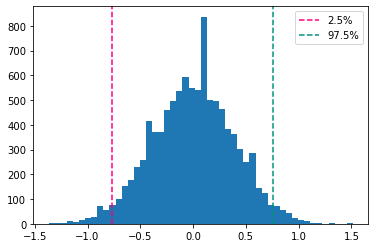

0.3556


In [334]:
#Перестановочный тест
x,y = np.hstack([np.zeros(len(glasnie)), np.ones(len(soglasnie))]),np.hstack([glasnie, soglasnie])
permtest=[]
for i in range(10**4):
    x1= np.random.permutation(x)
    one=np.mean(y[x1 == 1])
    null=np.mean(y[x1 == 0])
    permtest.append(one-null)
lperm= np.quantile(permtest, 0.025)
rperm= np.quantile(permtest, 0.975)
plt.hist(permtest, bins=50)
plt.axvline(lperm, color='#FF007F',linestyle='--',label='2.5%')
plt.axvline(rperm, color='#02907F',linestyle='--',label='97.5%')
plt.legend()
plt.show()
pe1=0
pe2=0
for j in range(10**4):
    if permtest[j]<=observed:
        pe1+=1
    if permtest[j]>observed:
        pe2+=1
pvaluep = 2 * min(np.mean(pe1),np.mean(pe2))/10**4
print(pvaluep)

In [335]:
#Аналогично предыдущему пункту, гипотеза о равенстве не отвергается на уровне значимости 5%.

In [360]:
#Задача 5
more_glas=df.loc[(df['First Letter'] == 1)&(df['Экзамен']>df['Экзамен'].median())]['Экзамен'].count()
less_glas=df.loc[(df['First Letter'] == 1)&(df['Экзамен']<=df['Экзамен'].median())]['Экзамен'].count()
more_sogl=df.loc[(df['First Letter'] == 0)&(df['Экзамен']>df['Экзамен'].median())]['Экзамен'].count()
less_sogl=df.loc[(df['First Letter'] == 0)&(df['Экзамен']<=df['Экзамен'].median())]['Экзамен'].count()
ex=pd.DataFrame({'Гласные':[more_glas,less_glas],'Согласные':[more_sogl,less_sogl]},['больше медианы','меньше медианы'])
ex

,Гласные,Согласные
больше медианы,18,110
меньше медианы,25,143


In [391]:
OR=np.log(18*143/(25*110))
a=np.sqrt(1/18+1/25+1/110+1/143)
bot=np.exp(OR-a*sts.norm.ppf(0.975))
up=np.exp(OR+a*sts.norm.ppf(0.975))
pvalueOR=2 * sts.norm.cdf(OR/a)
print('CI')
print('(',bot, ',',up,')')
print('p-value')
print(pvalueOR)
#Гипотеза о равенстве не отвергается на уровне 5%.

CI
( 0.48625960072135765 , 1.801704272163114 )
p-value
0.8430847181626729


In [89]:
#Задача 7
#https://chat.openai.com/c/4f94e81f-8be4-44d2-a92f-52427da633ec
#Chat-GPT справился с первого раза с этой задачей, но вот задачи без конкретных данных не брал никак, как например вот здесь:
#https://chat.openai.com/c/cc416006-b7c1-4638-9489-cb8830e890e3

In [90]:
#Задача 8
#Очень помог курс по питону для понимания мат стата и сайты с документацией, например
#https://www.statsmodels.org/stable/i,ndex.html